# Chapter 8 - Ex4
# Use bill_authentication.csv data to build SVM classifier model to predict Class ['0', '1']

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

np.set_printoptions(suppress = True)

In [2]:
bill = pd.read_csv('Data/bill_authentication.csv')
bill

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [3]:
bill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [4]:
bill['Class'].value_counts()

Class
0    762
1    610
Name: count, dtype: int64

## <span style='color:yellow'> Build SVM Classifier model

In [5]:
x = bill.drop('Class', axis = 1)
y = bill['Class']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

Accuracy on train set: 1.0
Accuracy on test  set: 1.0


Confusion matrix:
      0    1
0  235    0
1    0  177


Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       1.00      1.00      1.00       177

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



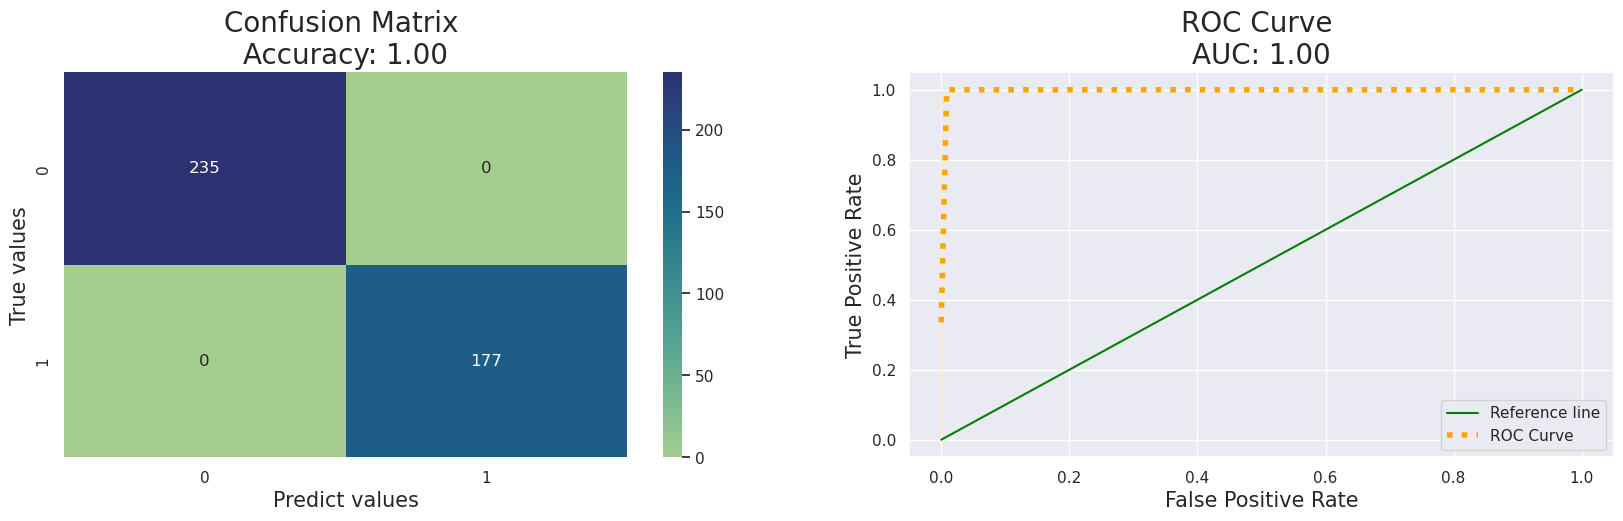

In [10]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

svmC = SVC(kernel = 'rbf', C = 100, probability = True).fit(x_train, y_train)

y_test_pred = svmC.predict(x_test)
y_test_proba = svmC.predict_proba(x_test)

print(f'Accuracy on train set: {svmC.score(x_train, y_train)}')
print(f'Accuracy on test  set: {svmC.score(x_test, y_test)}')
print()

labels = ['0', '1']
cm_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred), index=labels, columns=labels)
print(f'\nConfusion matrix:\n {cm_df}')
print()
print(f'\nClassification report:\n {classification_report(y_test, y_test_pred, target_names=labels)}')

sbn.set_theme(style='darkgrid')
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sbn.heatmap(cm_df, cmap='crest', annot=True, fmt='g')
plt.xlabel("Predict values", size=15)
plt.ylabel("True values", size=15)
plt.title(f'Confusion Matrix \nAccuracy: {svmC.score(x_test, y_test):.2f}', size=20)



#ROC and AUC are only for binary classification
#For multiclass, must be "one and the rest"

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:,1], pos_label=None)

plt.subplot(1,2,2)
sbn.lineplot(x = [0,1], y = [0,1], label = 'Reference line', color = 'green')
sbn.lineplot(x = fpr, y = tpr, label = 'ROC Curve', linestyle = 'dotted', color = 'orange', linewidth=4)
plt.xlabel('False Positive Rate', size=15)
plt.ylabel('True Positive Rate', size=15)
plt.title(f'ROC Curve \nAUC: {auc(fpr, tpr):.2f}', size=20)
plt.show()